# 8_coronal_sagittal_cc_in_out_deg_compare

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
zxw1_deg = pd.read_csv('..data/coronal_all_cc_out_vs_in_gene.csv')
zxw1_deg

,Unnamed: 0,names,scores,logfoldchanges,pvals,pvals_adj,log_pval,comparison
0,0,Gfap,119.552864,2.961014,0.0,0.0,inf,cc-out_vs_cc_in
1,1,Fam107a,101.277850,2.966981,0.0,0.0,inf,cc-out_vs_cc_in
2,2,Acsbg1,78.532550,2.523039,0.0,0.0,inf,cc-out_vs_cc_in
3,3,Slc17a7,74.491930,3.045114,0.0,0.0,inf,cc-out_vs_cc_in
4,4,Id4,73.924090,2.437699,0.0,0.0,inf,cc-out_vs_cc_in
...,...,...,...,...,...,...,...,...
1106,1106,Grm3,-59.469433,-1.069267,0.0,0.0,inf,cc-out_vs_cc_in
1107,1107,Gprc5b,-61.270737,-0.411187,0.0,0.0,inf,cc-out_vs_cc_in
1108,1108,Mog,-64.613570,-0.375698,0.0,0.0,inf,cc-out_vs_cc_in
1109,1109,Sec14l5,-80.332520,-1.933895,0.0,0.0,inf,cc-out_vs_cc_in


In [3]:
zxw3_deg = pd.read_csv('../data/sagittal_all_cc_out_vs_in_gene.csv')
zxw3_deg

,Unnamed: 0,names,scores,logfoldchanges,pvals,pvals_adj,log_pval
0,0,Gfap,86.087240,3.226564,0.0,0.0,inf
1,1,Sstr1,66.189080,4.045555,0.0,0.0,inf
2,2,Fam107a,63.092552,3.008477,0.0,0.0,inf
3,3,Slc17a7,54.659230,3.349460,0.0,0.0,inf
4,4,Acsbg1,43.139275,2.211851,0.0,0.0,inf
...,...,...,...,...,...,...,...
1106,1106,Grm3,-42.883160,-1.661856,0.0,0.0,inf
1107,1107,Dscaml1,-45.509216,-2.303302,0.0,0.0,inf
1108,1108,Cldn11,-49.790493,-0.007955,0.0,0.0,inf
1109,1109,Sema6a,-50.425950,-2.009346,0.0,0.0,inf


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

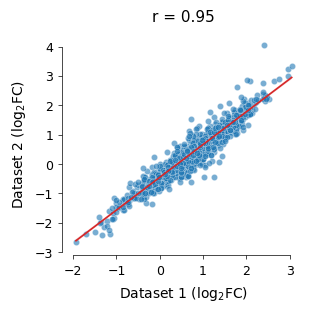

In [42]:
# 设置参数
plt.rcParams.update({
    # 'font.family': 'sans-serif',
    # 'font.sans-serif': ['Arial'],
    'font.size': 9,
    'axes.titlesize': 11,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'savefig.dpi': 300
})

# 使用相同的数据准备流程
common_genes = zxw1_deg['names'].tolist()

df1_aligned = zxw1_deg[zxw1_deg['names'].isin(common_genes)].set_index('names').sort_index()
df2_aligned = zxw3_deg[zxw3_deg['names'].isin(common_genes)].set_index('names').sort_index()

correlation = df1_aligned['logfoldchanges'].corr(df2_aligned['logfoldchanges'])

merged_df = pd.DataFrame({
    'Expression_1': df1_aligned['logfoldchanges'],
    'Expression_2': df2_aligned['logfoldchanges']
})

# 创建图形
plt.figure(figsize=(3.3, 3.3)) 
ax = plt.gca()

# 绘制散点图（使用更学术的颜色和透明度）
scatter = sns.regplot(
    x='Expression_1',
    y='Expression_2',
    data=merged_df,
    scatter_kws={
        's': 20,
        'color': '#1f77b4',  # 更柔和的蓝色
        'alpha': 0.6,
        'edgecolor': 'w',
        'linewidth': 0.3
    },
    line_kws={
        'color': '#d62728',  # 更醒目的红色
        'linewidth': 1.2
    },
    ci=95  # 显示95%置信区间
)

# 设置坐标轴风格
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
sns.despine(trim=True, offset=2)  # 移除上、右边框

# 设置标签和标题
plt.title(f'r = {correlation:.2f}', pad=10, fontweight='medium')
plt.xlabel('Dataset 1 (log$_2$FC)', labelpad=5)
plt.ylabel('Dataset 2 (log$_2$FC)', labelpad=5)

# 调整刻度线
ax.tick_params(width=0.5, length=3, which='both')

# 添加半透明网格（可选）
# ax.grid(True, linestyle='--', alpha=0.3, linewidth=0.5)

# 紧凑布局
plt.tight_layout(pad=1.5)

# plt.show()
# plt.savefig('/mnt/Data16Tc/home/haichao/code/sainsc-study-main/cluster_result/paper_fig2/cc_in_out_deg_compare.pdf', bbox_inches='tight', format='pdf')

In [4]:
zxw1_deg_top100 = zxw1_deg.nlargest(100, 'logfoldchanges')
zxw3_deg_top100 = zxw3_deg.nlargest(100, 'logfoldchanges')
zxw1_deg_top100

,Unnamed: 0,names,scores,logfoldchanges,pvals,pvals_adj,log_pval,comparison
3,3,Slc17a7,74.491930,3.045114,0.000000e+00,0.000000e+00,inf,cc-out_vs_cc_in
1,1,Fam107a,101.277850,2.966981,0.000000e+00,0.000000e+00,inf,cc-out_vs_cc_in
0,0,Gfap,119.552864,2.961014,0.000000e+00,0.000000e+00,inf,cc-out_vs_cc_in
24,24,Stac2,43.515114,2.741199,0.000000e+00,0.000000e+00,inf,cc-out_vs_cc_in
57,57,Kcnh3,28.302246,2.647537,3.242797e-176,4.740457e-175,175.489080,cc-out_vs_cc_in
...,...,...,...,...,...,...,...,...
145,145,Syndig1,12.873200,1.738300,6.370649e-38,3.867645e-37,37.195816,cc-out_vs_cc_in
398,398,Fibcd1,3.639619,1.737264,2.730421e-04,6.594559e-04,3.563770,cc-out_vs_cc_in
371,371,Acvr1c,4.170446,1.735889,3.040033e-05,7.872906e-05,4.517122,cc-out_vs_cc_in
135,135,Calb1,14.095745,1.733454,4.033682e-45,2.605477e-44,44.394298,cc-out_vs_cc_in


In [5]:
zxw1_deg_small100 = zxw1_deg.nsmallest(100, 'logfoldchanges')
zxw3_deg_small100 = zxw3_deg.nsmallest(100, 'logfoldchanges')
zxw1_deg_small100

,Unnamed: 0,names,scores,logfoldchanges,pvals,pvals_adj,log_pval,comparison
1109,1109,Sec14l5,-80.332520,-1.933895,0.000000,0.000000,inf,cc-out_vs_cc_in
1100,1100,Adamtsl1,-38.866173,-1.699647,0.000000,0.000000,inf,cc-out_vs_cc_in
1103,1103,Dscaml1,-50.880287,-1.499207,0.000000,0.000000,inf,cc-out_vs_cc_in
1101,1101,Tnfaip6,-46.938343,-1.410299,0.000000,0.000000,inf,cc-out_vs_cc_in
1105,1105,Sema6a,-58.445510,-1.381543,0.000000,0.000000,inf,cc-out_vs_cc_in
...,...,...,...,...,...,...,...,...
989,989,Kcnh8,-0.429622,-0.261252,0.667471,0.747636,0.175568,cc-out_vs_cc_in
985,985,Ptprc,-0.355616,-0.259794,0.722128,0.786554,0.141386,cc-out_vs_cc_in
1014,1014,Lama3,-1.007572,-0.249090,0.313660,0.436978,0.503541,cc-out_vs_cc_in
1017,1017,Gpr4,-1.041164,-0.246525,0.297799,0.422803,0.526076,cc-out_vs_cc_in


In [22]:
len(set(zxw3_deg_small100['names'].tolist()) & set(zxw1_deg_small100['names'].tolist()))

83

In [23]:
len(set(zxw3_deg_top100['names'].tolist()) & set(zxw1_deg_top100['names'].tolist()))

78

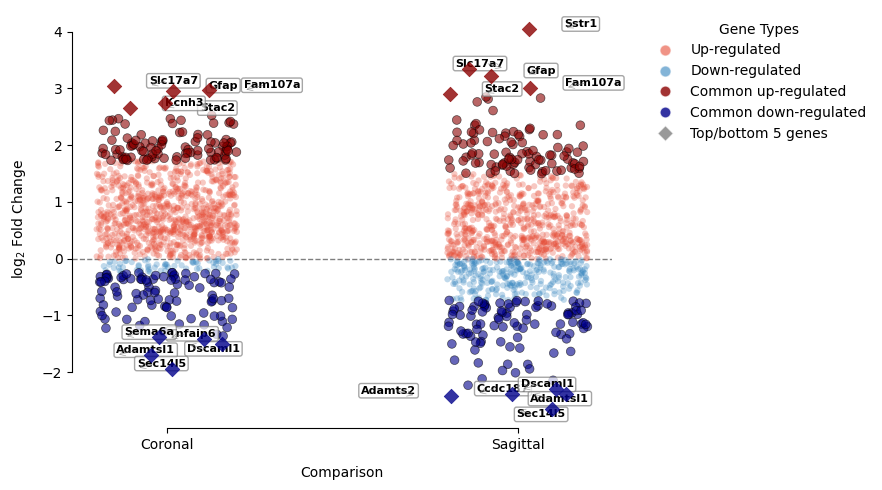

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from adjustText import adjust_text

# 数据准备
zxw1_deg['comparison'] = 'coronal'
zxw3_deg['comparison'] = 'sagittal'
df = pd.concat([zxw1_deg, zxw3_deg])

df['regulation'] = df['logfoldchanges'].apply(lambda x: 'Up' if x > 0 else 'Down')

# 针对coronal数据（zxw1_deg）挑选logfoldchanges最大的100个和最小的100个基因
coronal_top = zxw1_deg.nlargest(100, 'logfoldchanges')['names']
coronal_bottom = zxw1_deg.nsmallest(100, 'logfoldchanges')['names']
coronal_highlight = set(coronal_top).union(set(coronal_bottom))

# 针对sagittal数据（zxw3_deg）挑选logfoldchanges最大的100个和最小的100个基因
sagittal_top = zxw3_deg.nlargest(100, 'logfoldchanges')['names']
sagittal_bottom = zxw3_deg.nsmallest(100, 'logfoldchanges')['names']
sagittal_highlight = set(sagittal_top).union(set(sagittal_bottom))

# 根据comparison分别设置highlight列
def highlight_flag(row):
    if row['comparison'] == 'coronal':
        return row['names'] in coronal_highlight
    else:
        return row['names'] in sagittal_highlight

df['highlight'] = df.apply(highlight_flag, axis=1)

# 使用具有唯一索引的数据框
df = df.reset_index(drop=True)

# 指定标注的基因 - 为每组分别标记top和bottom 5个基因
# 为coronal数据标记
coronal_data = df[df['comparison'] == 'coronal'].copy()
coronal_top_indices = coronal_data.nlargest(5, 'logfoldchanges').index
coronal_bottom_indices = coronal_data.nsmallest(5, 'logfoldchanges').index

# 为sagittal数据标记
sagittal_data = df[df['comparison'] == 'sagittal'].copy()
sagittal_top_indices = sagittal_data.nlargest(5, 'logfoldchanges').index
sagittal_bottom_indices = sagittal_data.nsmallest(5, 'logfoldchanges').index

# 初始化标记列
df['to_label'] = False
df.loc[coronal_top_indices, 'to_label'] = True
df.loc[coronal_bottom_indices, 'to_label'] = True
df.loc[sagittal_top_indices, 'to_label'] = True
df.loc[sagittal_bottom_indices, 'to_label'] = True

# 验证每组标记的基因数
coronal_labeled = df[df['to_label'] & (df['comparison'] == 'coronal')]
sagittal_labeled = df[df['to_label'] & (df['comparison'] == 'sagittal')]

# 将图改为左右排列：coronal在左，sagittal在右，x轴为组别，y轴为logfoldchanges
df['jitter_x'] = df['comparison'].map({'coronal': 0, 'sagittal': 1})
np.random.seed(39)
df['jitter_x'] = df['jitter_x'] + np.random.uniform(-0.2, 0.2, len(df))

df_label = df[df['to_label']].copy()
df_nonlabel = df[~df['to_label']].copy()

# 绘图
plt.figure(figsize=(9, 5))

# 绘制非标注基因点（普通圆点，颜色根据regulation，且不在highlight内）
ax = sns.scatterplot(
    x='jitter_x',
    y='logfoldchanges',
    hue='regulation',
    data=df_nonlabel[~df_nonlabel['highlight']],
    palette={'Up': '#E64B35', 'Down': '#3182BD'},
    s=20,
    alpha=0.3,
    edgecolor='none',
    marker='o'
)

# 绘制高亮基因点（使用更深的颜色），只对非标注数据
sns.scatterplot(
    x='jitter_x',
    y='logfoldchanges',
    hue='regulation',
    data=df_nonlabel[df_nonlabel['highlight']],
    palette={'Up': '#8B0000', 'Down': '#00008B'},
    s=40,
    alpha=0.6,
    marker='o',
    edgecolor='black',
    linewidth=0.5,
    ax=ax,
    legend=False
)

# 绘制需要标注的点（使用菱形标记）
for idx, row in df_label.iterrows():
    is_up = row['logfoldchanges'] > 0
    is_highlight = row['highlight']
    # 根据是否高亮确定颜色
    color = '#8B0000' if is_up and is_highlight else '#00008B' if (not is_up and is_highlight) else '#E64B35' if is_up else '#3182BD'
    marker = 'D'
    size = 55
    ax.scatter(
        row['jitter_x'],
        row['logfoldchanges'],
        s=size,
        color=color,
        marker=marker,
        alpha=0.8,
        linewidth=0.5,
        zorder=10
    )

# 添加文本标注
texts = []
for idx, row in df_label.iterrows():
    gene_name = row['names']
    offset_x = 0.1 if row['logfoldchanges'] > 0 else -0.1
    ha = 'left' if row['logfoldchanges'] > 0 else 'right'
    text = ax.text(
        row['jitter_x'] + offset_x,
        row['logfoldchanges'],
        gene_name,
        fontsize=8,
        color='black',
        fontweight='bold',
        ha=ha,
        va='center',
        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='gray', alpha=0.7)
    )
    texts.append(text)

# 使用adjustText避免文本重叠
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.5, alpha=0.7),
    expand_points=(0.5, 0.5),
    expand_text=(0.5, 0.5),
    force_text=(0.4, 1.3)
)

# 辅助线：y轴=0的水平线
ax.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5, zorder=0)

# 坐标轴优化
ax.set_xticks([0, 1])
ax.set_xticklabels(['Coronal', 'Sagittal'])
ax.set_xlabel('Comparison', labelpad=10)
ax.set_ylabel('log$_2$ Fold Change', labelpad=10)
sns.despine(trim=True)

# 图例定制
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Up-regulated',
               markerfacecolor='#E64B35', markersize=8, alpha=0.6),
    plt.Line2D([0], [0], marker='o', color='w', label='Down-regulated',
               markerfacecolor='#3182BD', markersize=8, alpha=0.6),
    plt.Line2D([0], [0], marker='o', color='w', label='Common up-regulated',
               markerfacecolor='#8B0000', markersize=8, alpha=0.8),
    plt.Line2D([0], [0], marker='o', color='w', label='Common down-regulated',
               markerfacecolor='#00008B', markersize=8, alpha=0.8),
    plt.Line2D([0], [0], marker='D', color='w', label='Top/bottom 5 genes',
               markerfacecolor='gray', markersize=8, alpha=0.8)
]

ax.legend(handles=legend_elements,
          bbox_to_anchor=(1.05, 1),
          frameon=False,
          title='Gene Types')

# 自动调整布局
plt.tight_layout()
# plt.show()
# plt.savefig('/mnt/Data16Tc/home/haichao/code/sainsc-study-main/cluster_result/paper_fig2/cc_in_out_deg.pdf', bbox_inches='tight', format='pdf')